# Ar41 in new muon sample (10k muons with showering)
In this notebook, we aim to analyse the neutron capture that lead to the creation of Ar41 and the gamma emission during the process. This analysis is conducted on the new muons sample by CJ, given at 2020.03.20

We would like to confirm the thesis that G4 doesn't simulate the Ar41 excitation but the gamma emission is consistent with the expectectation w.r.t. kinetic energy.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

filepath = os.path.join("..", "Data", "output10000.csv")
df = pd.read_csv(filepath, index_col=False)
ar41 = df[df.PID==1000180410].groupby(["eventnumber", "tracknumber"]).first().reset_index()

print("AR41 CREATIONS")
ar41

AR41 CREATIONS


,eventnumber,tracknumber,PID,ParentTrackID,energydeposition,kineticenergy,time,x,y,z,px,py,pz,creatorprocess,parentnucleusPID
0,245,4976,1000180410,4941,4.218990,0.0,1066.12,-1516.100,400.926,-794.16300,0.569367,-0.541368,0.618661,nCapture,1000180410
1,2142,768,1000180410,729,0.472954,0.0,506534.00,-1341.350,661.670,-1050.78000,-0.351013,-0.934867,0.053041,nCapture,1000180410
2,2349,1421241,1000180410,1421094,0.448457,0.0,278133.00,822.405,1297.590,1796.35000,0.053803,0.951713,-0.302237,nCapture,1000180410
3,4258,3922,1000180410,3824,0.477829,0.0,412278.00,715.480,1739.150,-1648.91000,-0.151803,0.482426,-0.862682,nCapture,1000180410
4,4682,56560,1000180410,56465,0.469186,0.0,330160.00,1238.960,784.462,-1823.68000,0.398057,0.315239,-0.861496,nCapture,1000180410
5,4880,4524,1000180410,4138,0.476889,0.0,671737.00,1037.130,-1422.180,875.49800,0.297504,-0.831137,-0.469789,nCapture,1000180410
6,4880,5099,1000180410,4996,0.450402,0.0,98698.40,946.629,986.602,398.72700,0.701521,-0.445189,-0.556484,nCapture,1000180410
7,4880,5437,1000180410,5303,0.436208,0.0,18020.30,-348.605,1850.910,-1036.06000,-0.393808,-0.757917,0.520073,nCapture,1000180410
8,5769,5309,1000180410,5265,0.444170,0.0,1145830.00,651.382,361.775,586.07900,0.700856,0.364625,-0.613065,nCapture,1000180410
9,7718,10852,1000180410,10674,0.437911,0.0,194430.00,-1149.950,786.420,8.35088,0.772345,-0.536364,0.340291,nCapture,1000180410


The table above shows the **12 Ar41 atoms** that have been created by neutron capture.

In the following, we want to compute the amount of KE released in gammas from this events. We proceed as follow:
1. extract the *neutrons* that are parent of these Ar41s (*i.e. the neutrons captured*).
1. extract the *gammas* that are children of these neutrons and *filter* the gammas related to the neutron capture event that has generated Ar41
1. *sum up* the *KE* at the creation of gammas

### Extract captured neutrons
The table below shows the **12 neutrons** that are captured by Ar40 and lead to creation of Ar41.

**Note implementation:** using *join*, I have to rename the columns to keep the same format. Sorry for the mess.

In [2]:
neutron_join = pd.merge(ar41, df, left_on=["eventnumber", "ParentTrackID"], right_on=["eventnumber", "tracknumber"], suffixes=("_a", "_n"))
neutrons = neutron_join.sort_values("time_n").groupby(["eventnumber", "tracknumber_n"]).first().reset_index()

# Formatting after join
neutron_field = ['eventnumber', 'tracknumber_n', 'PID_n', 'ParentTrackID_n', 'energydeposition_n',
       'kineticenergy_n', 'time_n', 'x_n', 'y_n', 'z_n', 'px_n', 'py_n', 'pz_n', 'creatorprocess_n', 'parentnucleusPID_n']
neutron_renames = ['eventnumber', 'tracknumber', 'PID', 'ParentTrackID', 'energydeposition',
       'kineticenergy', 'time', 'x', 'y', 'z', 'px', 'py', 'pz', 'creatorprocess', 'parentnucleusPID']
neutrons = neutrons[neutron_field]   # discard the fields from ar41 that are included because of `join`
neutrons.columns = neutron_renames

print("NEUTRONS CAPTURED")
neutrons

NEUTRONS CAPTURED


,eventnumber,tracknumber,PID,ParentTrackID,energydeposition,kineticenergy,time,x,y,z,px,py,pz,creatorprocess,parentnucleusPID
0,245,4941,2112,4746,0.0,702.521000,86.2803,-679.3300,1827.8400,-436.916,-0.666024,0.170946,0.726078,neutronInelastic,0
1,2142,729,2112,274,0.0,1739.640000,686.1910,-1135.1800,1470.1400,-974.831,0.154431,0.369114,-0.916464,neutronInelastic,0
2,2349,1421094,2112,1420077,0.0,415.849000,87.6049,-1201.4900,1006.8200,856.906,0.381333,0.924433,0.002967,neutronInelastic,0
3,4258,3824,2112,3818,0.0,251.861000,60.5333,787.1850,1436.8500,1176.760,-0.065316,-0.989355,-0.130044,neutronInelastic,0
4,4682,56465,2112,29353,0.0,0.000054,173186.0000,1124.3800,948.5380,-1841.350,0.203118,-0.300147,-0.932016,neutronInelastic,0
5,4880,4138,2112,251,0.0,764.632000,54.2294,672.8410,1167.4100,546.642,-0.752008,-0.653529,-0.085931,neutronInelastic,0
6,4880,4996,2112,4863,0.0,213.763000,87.0145,1232.0000,1287.4000,-172.653,-0.155372,-0.808421,-0.567728,neutronInelastic,0
7,4880,5303,2112,5296,0.0,1089.080000,65.8617,-66.7624,722.6440,474.478,0.965122,-0.189732,0.180391,neutronInelastic,0
8,5769,5265,2112,1817,0.0,123.531000,212.7030,947.0010,1242.9500,1492.010,-0.836478,-0.435106,0.333147,neutronInelastic,0
9,7718,10674,2112,10516,0.0,1562.900000,65.5038,-414.9320,1269.0100,-316.531,-0.673671,0.344916,-0.653606,neutronInelastic,0


### Extract gamma produced in neutron capture
The table below shows the **22 gammas** released during the **12 neutron captures**. This is ok because more than one gamma could be released in each neutron capture event.

Even in this case, we use *join* and we report only the filtered column related to the gammas.

**Note:** the time of gammas is consistend with time of Ar41! This is not exactly the same because the output scheme used by CJ writes the entry only when the energy is released or a G4 step is forced by some event. (*e.g. in event 245, the Ar41 is create at time 1066.12 and the gamma time is 1067.17*).

In [3]:
gamma_join = pd.merge(neutrons, df, left_on=["eventnumber", "tracknumber"], right_on=["eventnumber", "ParentTrackID"], suffixes=("_n", "_g"))
gammas = gamma_join[gamma_join.PID_g == 22].sort_values("time_g").groupby(["eventnumber", "tracknumber_g"]).first().reset_index()

# Formatting after join
gamma_field = ['eventnumber', 'tracknumber_g', 'PID_g', 'ParentTrackID_g', 'energydeposition_g',
               'kineticenergy_g', 'time_g', 'x_g', 'y_g', 'z_g', 'px_g', 'py_g', 'pz_g', 'creatorprocess_g', 'parentnucleusPID_g']
gamma_renames = ['eventnumber', 'tracknumber', 'PID', 'ParentTrackID', 'energydeposition',
               'kineticenergy', 'time', 'x', 'y', 'z', 'px', 'py', 'pz', 'creatorprocess', 'parentnucleusPID']
gammas = gammas[gamma_field]
gammas.columns = gamma_renames

print("GAMMAS FROM AR41 and NEUTRON CAPTURE")
gammas

GAMMAS FROM AR41 and NEUTRON CAPTURE


,eventnumber,tracknumber,PID,ParentTrackID,energydeposition,kineticenergy,time,x,y,z,px,py,pz,creatorprocess,parentnucleusPID
0,245,4975,22,4941,0.0000,0.000,1067.17,-1724.720,258.226,-607.0430,-0.663366,-0.453767,0.595014,nCapture,0
1,2142,766,22,729,0.0000,1090.000,506535.00,-1243.430,889.352,-1055.0900,0.929051,0.365298,0.058491,nCapture,0
2,2142,767,22,729,0.0000,111.607,506535.00,-1325.920,672.285,-1059.1700,0.253933,-0.171872,0.951829,nCapture,0
3,2349,1421239,22,1421094,0.0000,5931.140,278135.00,795.311,795.354,1950.0000,-0.051519,-0.954981,0.292158,nCapture,0
4,2349,1421240,22,1421094,0.0000,149.186,278133.00,829.160,1319.100,1798.2000,0.907845,0.357241,0.219538,nCapture,0
5,4258,3921,22,3824,0.0000,0.000,412279.00,787.339,1503.340,-1230.0800,0.147863,-0.485211,0.861804,nCapture,0
6,4682,56558,22,56465,0.0000,2277.160,330161.00,1189.570,746.059,-1723.5000,-0.294550,-0.759884,0.579497,nCapture,0
7,4682,56559,22,56465,3.2063,0.000,330161.00,1329.960,818.554,-1709.4400,0.606714,0.227307,0.761728,nCapture,0
8,4880,4522,22,4138,0.0000,1395.630,671738.00,974.220,-1251.720,967.8210,-0.044976,0.971135,-0.234252,nCapture,0
9,4880,4523,22,4138,0.0000,130.060,671737.00,1038.430,-1420.690,880.3700,-0.276492,-0.839583,0.467603,nCapture,0


### See the gamma KE
The table below shows the **CUMULATIVE** kinetic energy for each of the 12 neutron captures.

**Note:** some **KE==0**. *Probably*, this is because the gamma entry is **not** at gamma creation but it is written according to the output scheme by CJ. Then, it doesn't mean that the gamma has KE 0 at creation but rather that when it is recorder its KE is 0.

In [4]:
cum_ke = gammas.groupby(["eventnumber", "ParentTrackID"]).kineticenergy.sum().reset_index()
cum_ke.columns = ["eventnumber", "neutron_tracknumber", "sum_KE_gamma"]
cum_ke

,eventnumber,neutron_tracknumber,sum_KE_gamma
0,245,4941,0.000
1,2142,729,1201.607
2,2349,1421094,6080.326
3,4258,3824,0.000
4,4682,56465,2277.160
5,4880,4138,1525.690
6,4880,4996,0.000
7,4880,5303,6071.517
8,5769,5265,0.000
9,7718,10674,4100.000


### See what happens from these gammas wt KE=0
Some of the neutron captures above release gamma with cumulative KE = 0. This is **not weird** because the entries are not related to the creation of gamma, rather the first G4 step that match the output scheme by CJ.

Then, we check what happen from these gammas. They all generate **e+ and e-** that deposit energy with the following processes:
- conv (**what is?**)
- photoelectric
- compton

The sum of energy deposited by these secondary processes from those gamma, is reported in the following table.

In [5]:
events_0ke = cum_ke[cum_ke.sum_KE_gamma==0].eventnumber    # event numbers where gammas have KE 0 keV
gammas_0ke = gammas[(gammas.kineticenergy==0) & (gammas.eventnumber.isin(events_0ke))][["eventnumber", "tracknumber"]]
gammas_0ke

children = pd.merge(gammas_0ke, df, left_on=["eventnumber", "tracknumber"], right_on=["eventnumber", "ParentTrackID"], validate="1:m")
secondary_edep = children.groupby(["eventnumber"]).energydeposition.sum().reset_index()
secondary_edep.columns = ["eventnumber", "sum_Edep_by_sec"]
secondary_edep

,eventnumber,sum_Edep_by_sec
0,245,5256.3439
1,4258,4947.6060
2,4880,3683.1304
3,5769,5057.4401


### Example: gamma wt KE=0 in event 245
In the following table, we report the entries of particles created by the gamma `4975`, one of those gamma with KE=0.

These are related to 1 electron and 1 positron, created by the process `conv` (*i.e. photon CONVersion, or pair production).

The time of the first entry of the electron and positron is right after the gamma entry wt KE=0.

In [6]:
event245 = df[df.eventnumber==245].sort_values("time")

fields = ['eventnumber', 'tracknumber', 'PID', 'energydeposition',
          'kineticenergy', 'time', 'x', 'y', 'z', 'creatorprocess']
event245[event245.ParentTrackID==4975][fields]

,eventnumber,tracknumber,PID,energydeposition,kineticenergy,time,x,y,z,creatorprocess
35692,245,5106,11,406.8360,750.935,1067.18,-1725.42,257.852,-605.772,conv
35693,245,5106,11,370.5730,380.362,1067.18,-1726.01,257.851,-605.070,conv
35694,245,5106,11,69.1969,304.647,1067.18,-1725.89,257.795,-604.830,conv
35695,245,5106,11,304.6470,0.000,1067.18,-1725.84,258.032,-604.889,conv
35704,245,5107,-11,1150.2200,2985.670,1067.19,-1728.37,255.591,-604.568,conv
35705,245,5107,-11,597.6510,2373.170,1067.20,-1730.43,256.083,-602.671,conv
35706,245,5107,-11,263.8310,2093.390,1067.20,-1731.35,256.712,-601.357,conv
35707,245,5107,-11,723.5440,1369.840,1067.21,-1733.38,255.587,-602.866,conv
35708,245,5107,-11,409.3680,960.476,1067.22,-1733.17,254.308,-604.190,conv
35709,245,5107,-11,542.5790,417.897,1067.22,-1732.07,253.672,-604.015,conv


In [7]:
event245[event245.ParentTrackID==5107].groupby("tracknumber").first().reset_index()[fields]

,eventnumber,tracknumber,PID,energydeposition,kineticenergy,time,x,y,z,creatorprocess
0,245,5128,22,3.2063,0.000,1067.20,-1730.53,256.142,-602.608,eBrem
1,245,5129,22,3.2063,0.000,1067.21,-1731.45,256.552,-601.444,eBrem
2,245,5130,22,0.0000,489.183,1067.56,-1788.66,173.183,-582.940,annihil
3,245,5131,22,0.0000,328.509,1067.73,-1647.45,374.744,-636.253,annihil


## See the energy deposition from Ar41-deexcitation gammas

In [74]:
common_fields = ['eventnumber', 'tracknumber', 'PID', 'ParentTrackID', 'energydeposition',
                 'kineticenergy', 'time', 'x', 'y', 'z', 'creatorprocess']

# 1. Start from gammas by AR41 deexcitation
ar41_gammas = gammas[["eventnumber", "tracknumber"]]

# 2. Children can be electrons (compton, photoelectric) or electrons,positrons (pair-production)
children = pd.merge(ar41_gammas, df, left_on=["eventnumber", "tracknumber"], right_on=["eventnumber", "ParentTrackID"], validate="1:m")
# Format columns after join
children_fields = ['eventnumber', 'tracknumber_y', 'PID', 'ParentTrackID', 'energydeposition',
                   'kineticenergy', 'time', 'x', 'y', 'z', 'creatorprocess']
children = children[children_fields]
children.columns = common_fields

# 3. If pair production, the positrons release gammas by annihilation (and eBrem also)
positrons = children[children.PID==-11].groupby(["eventnumber", "tracknumber"]).first().reset_index()
nephew_by_positrons = pd.merge(positrons, df, left_on=["eventnumber", "tracknumber"], right_on=["eventnumber", "ParentTrackID"], validate="1:m")
# Format columns after join
nephew_fields = ['eventnumber', 'tracknumber_y', 'PID_y', 'ParentTrackID_y', 'energydeposition_y',
                   'kineticenergy_y', 'time_y', 'x_y', 'y_y', 'z_y', 'creatorprocess_y']
nephew_by_positrons = nephew_by_positrons[nephew_fields]
nephew_by_positrons.columns = common_fields

# 4. The gammas from positrons, convert in electrons (compton, photoelectric)
gamma_ids_from_pos = nephew_by_positrons.groupby(["eventnumber", "tracknumber"]).first().reset_index()[["eventnumber", "tracknumber"]]
gamma_ids_from_pos
nephew_elect = pd.merge(gamma_ids_from_pos, df, left_on=["eventnumber", "tracknumber"], right_on=["eventnumber", "ParentTrackID"], validate="1:m")
# Format columns after join
nephew_fields = ['eventnumber', 'tracknumber_y', 'PID', 'ParentTrackID', 'energydeposition',
                 'kineticenergy', 'time', 'x', 'y', 'z', 'creatorprocess']
nephew_elect = nephew_elect[nephew_fields]
nephew_elect.columns = common_fields

# 5. Recap, we consider the energy deposition from electrons
# These electrons can be directly release from gammas of Ar41 de-exc.
# or derived through the process positrons->gammas->electrons
first_electrons = children[children.PID==11]    # children of Ar41 gammas, select electrons
deriv_electrons = nephew_elect                  # electrons from e+->g->e-

print("[Check] Should be all electrons: {} and {}".format(first_electrons.PID.unique(),
                                                          deriv_electrons.PID.unique()))

print("Energy depositions from particles derived by Ar41-deexc gammas")
secondary_electrons = pd.concat([first_electrons, deriv_electrons], axis=0)
edep_gammas_ar41 = secondary_electrons.groupby("eventnumber").energydeposition.sum()
edep_gammas_ar41

[Check] Should be all electrons: [11] and [11]
Energy depositions from particles derived by Ar41-deexc gammas


eventnumber
245      2191.228763
2142     5968.722754
2349      164.117050
4258     5567.927860
4682     5777.475100
4880    10001.609040
5769     1367.690390
7718     1995.256070
8387     6076.024500
9885     5658.780768
Name: energydeposition, dtype: float64

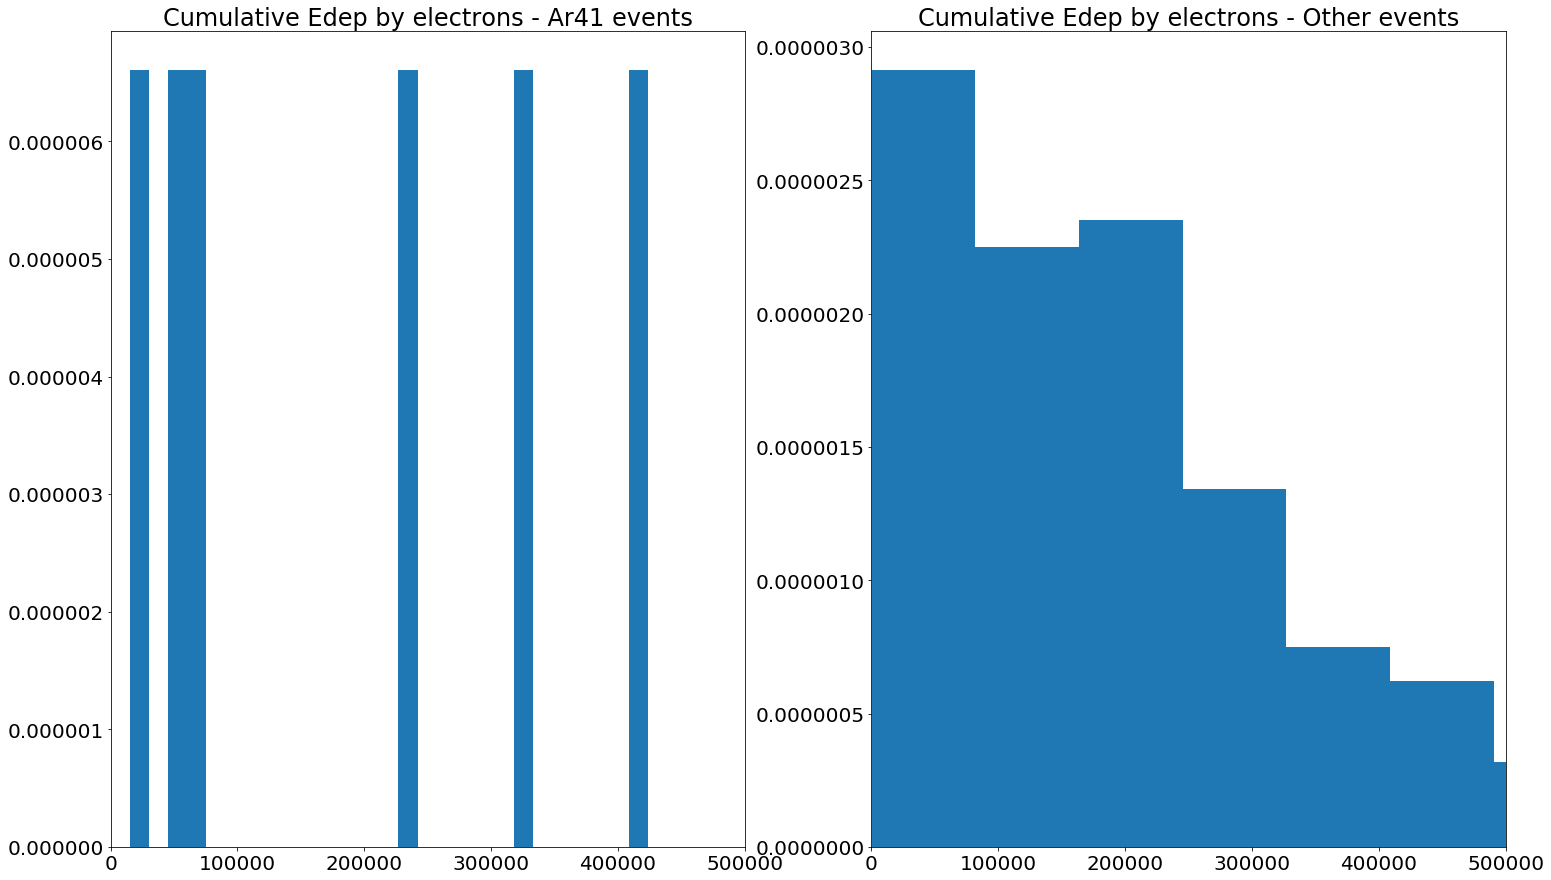

AR41 EVENTS - EDEP:
count    1.000000e+01
mean     7.172830e+05
std      1.122683e+06
min      1.506394e+04
25%      1.065048e+05
50%      3.711387e+05
75%      7.531029e+05
max      3.799423e+06
Name: energydeposition, dtype: float64
OTHER EVENTS - EDEP:
count    8.480000e+02
mean     3.930002e+05
std      1.113310e+06
min      1.183381e+02
25%      8.946027e+04
50%      1.914446e+05
75%      3.572389e+05
max      2.044288e+07
Name: energydeposition, dtype: float64


In [114]:
plt.rcParams['figure.figsize'] = [25, 15]
plt.rcParams.update({'font.size': 20})

### See the energy deposition from gammas in event not from Ar41
entries_ar41_events = df[(df.eventnumber.isin(ar41.eventnumber)) & (df.PID==11)]
cum_edep_ar41_events = entries_ar41_events.groupby("eventnumber").energydeposition.sum()

entries_other_events = df[(~df.eventnumber.isin(ar41.eventnumber)) & (df.PID==11)]
cum_edep_other_events = entries_other_events.groupby("eventnumber").energydeposition.sum()

# see cum edep distribution
num_bins, xlimit = 250, 5*10**5
plt.subplot(1, 2, 1)
plt.title("Cumulative Edep by electrons - Ar41 events")
plt.hist(cum_edep_ar41_events, num_bins, density=True)
plt.xlim(0, xlimit)
plt.subplot(1, 2, 2)
plt.title("Cumulative Edep by electrons - Other events")
plt.hist(cum_edep_other_events, num_bins, density=True)
plt.xlim(0, xlimit)
plt.show()

print("AR41 EVENTS - EDEP:\n{}".format(cum_edep_ar41_events.describe()))
print("OTHER EVENTS - EDEP:\n{}".format(cum_edep_other_events.describe()))

## Observations:
- Too few instances of Ar41 events to make a reasonable statistic.
- However, considering what we have: the Edep in Ar41 events is higher than other muon events.
- For example, the 50-th percentile in Ar41 events is ~371 MeV, whilst in the other events is ~191 MeV. Moreover, the 75-th percentile in Ar41 events is ~753 MeV and in other events is ~357 MeV. Finally, note that the maximum value of Edep has been found in events where Ar41 doesn't occur (~20GeV), but as I said the number of Ar41 events is not enough to make statistic.